# **Задание:**

Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:

*   обработку пропусков в данных;
*   кодирование категориальных признаков;
*   масштабирование данных.





# **Загрузка и первичный анализ данных**
Используем данные из датасета Titanic

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

In [ ]:
hdata_loaded = pd.read_csv('sample_data/Titanic-Dataset.csv', sep=",")
hdata_loaded.shape

(891, 12)

In [ ]:
hdata = hdata_loaded

In [ ]:
hdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('PassengerId', dtype('int64')),
 ('Survived', dtype('int64')),
 ('Pclass', dtype('int64')),
 ('Name', dtype('O')),
 ('Sex', dtype('O')),
 ('Age', dtype('float64')),
 ('SibSp', dtype('int64')),
 ('Parch', dtype('int64')),
 ('Ticket', dtype('O')),
 ('Fare', dtype('float64')),
 ('Cabin', dtype('O')),
 ('Embarked', dtype('O'))]

In [ ]:
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['Age', 'Cabin', 'Embarked']

In [ ]:
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Age', 177), ('Cabin', 687), ('Embarked', 2)]

In [ ]:
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('Age', 0.19865319865319866),
 ('Cabin', 0.7710437710437711),
 ('Embarked', 0.002244668911335578)]

# **Обработка пропусков в Age**

Пропуски составляют около 19.87% данных.

In [ ]:
def fill_age_groupwise(df):
    # Для каждого значения Pclass и Sex заполняем пропуски медианой
    hdata['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    return df['Age'].isnull().sum()
before_imputation = hdata["Age"].copy()
# Заполнение пропусков
fill_age_groupwise(hdata)


0

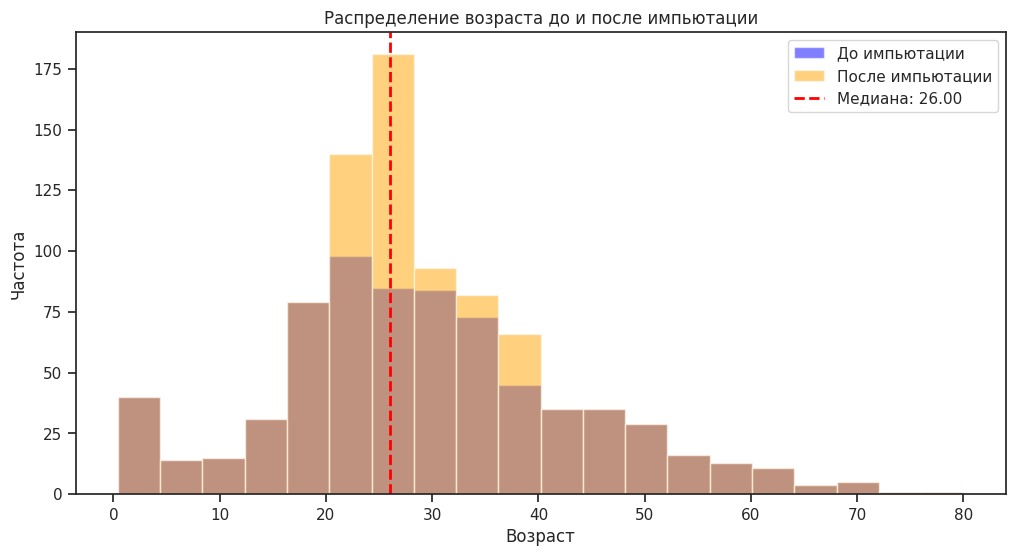

In [ ]:
# Рассчитываем процент пропущенных значений в колонке Age
missing_percentage_before = hdata_loaded["Age"].isnull().mean() * 100
missing_percentage_after = hdata["Age"].isnull().mean() * 100

# Построение гистограммы с выделением изменений
plt.figure(figsize=(12, 6))

# До импьютации
plt.hist(before_imputation.dropna(), bins=20, alpha=0.5, label='До импьютации', color='blue')

# Отображаем только импьютированные значения
plt.hist(hdata["Age"][hdata["Age"].isnull() == False], bins=20, alpha=0.5, label='После импьютации', color='orange')

# Добавляем информацию о медиане
plt.axvline(hdata["Age"].median(), color='red', linestyle='dashed', linewidth=2, label=f'Медиана: {hdata["Age"].median():.2f}')

# Подписи и легенда
plt.title(f'Распределение возраста до и после импьютации')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Отображаем график
plt.show()


# **Обработка пропусков в Cabin**

Пропуски составляют около 77.10% данных.

In [ ]:
hdata['Cabin'] = hdata['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')
hdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Ticket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Cabin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='PassengerId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ticket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ticket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cabin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cabin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex'].value_counts()
    for x_label, grp in _df_20.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ticket'].value_counts()
    for x_label, grp in _df_21.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Ticket')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cabin'].value_counts()
    for x_label, grp in _df_22.groupby('Ticket')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ticket')
_ = plt.ylabel('Cabin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in _df_23.groupby('Cabin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cabin')
_ = plt.ylabel('Embarked')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Ticket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='Ticket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Cabin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='Cabin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Обработка пропусков в Embarked**

Пропуски составляют около 0.22% данных.

In [ ]:
hdata['Embarked'] = hdata['Embarked'].fillna(hdata['Embarked'].mode()[0])
print(hdata['Embarked'].isnull().sum())

0


In [ ]:
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Age', 0), ('Cabin', 0), ('Embarked', 0)]

# **Кодирование категориальных признаков**

**One-Hot Encoding (для признаков без порядка)**

In [ ]:
cdata = hdata
cdata = pd.get_dummies(hdata, columns=['Embarked', 'Sex'])

**Label Encoding (для признаков с порядком)**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cdata['Cabin'] = label_encoder.fit_transform(hdata['Cabin'])

In [ ]:
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'U': 8}

In [ ]:
cdata.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,8,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,8,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,False,False,True,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,8,False,False,True,False,True


# **Масштабирование данных.**

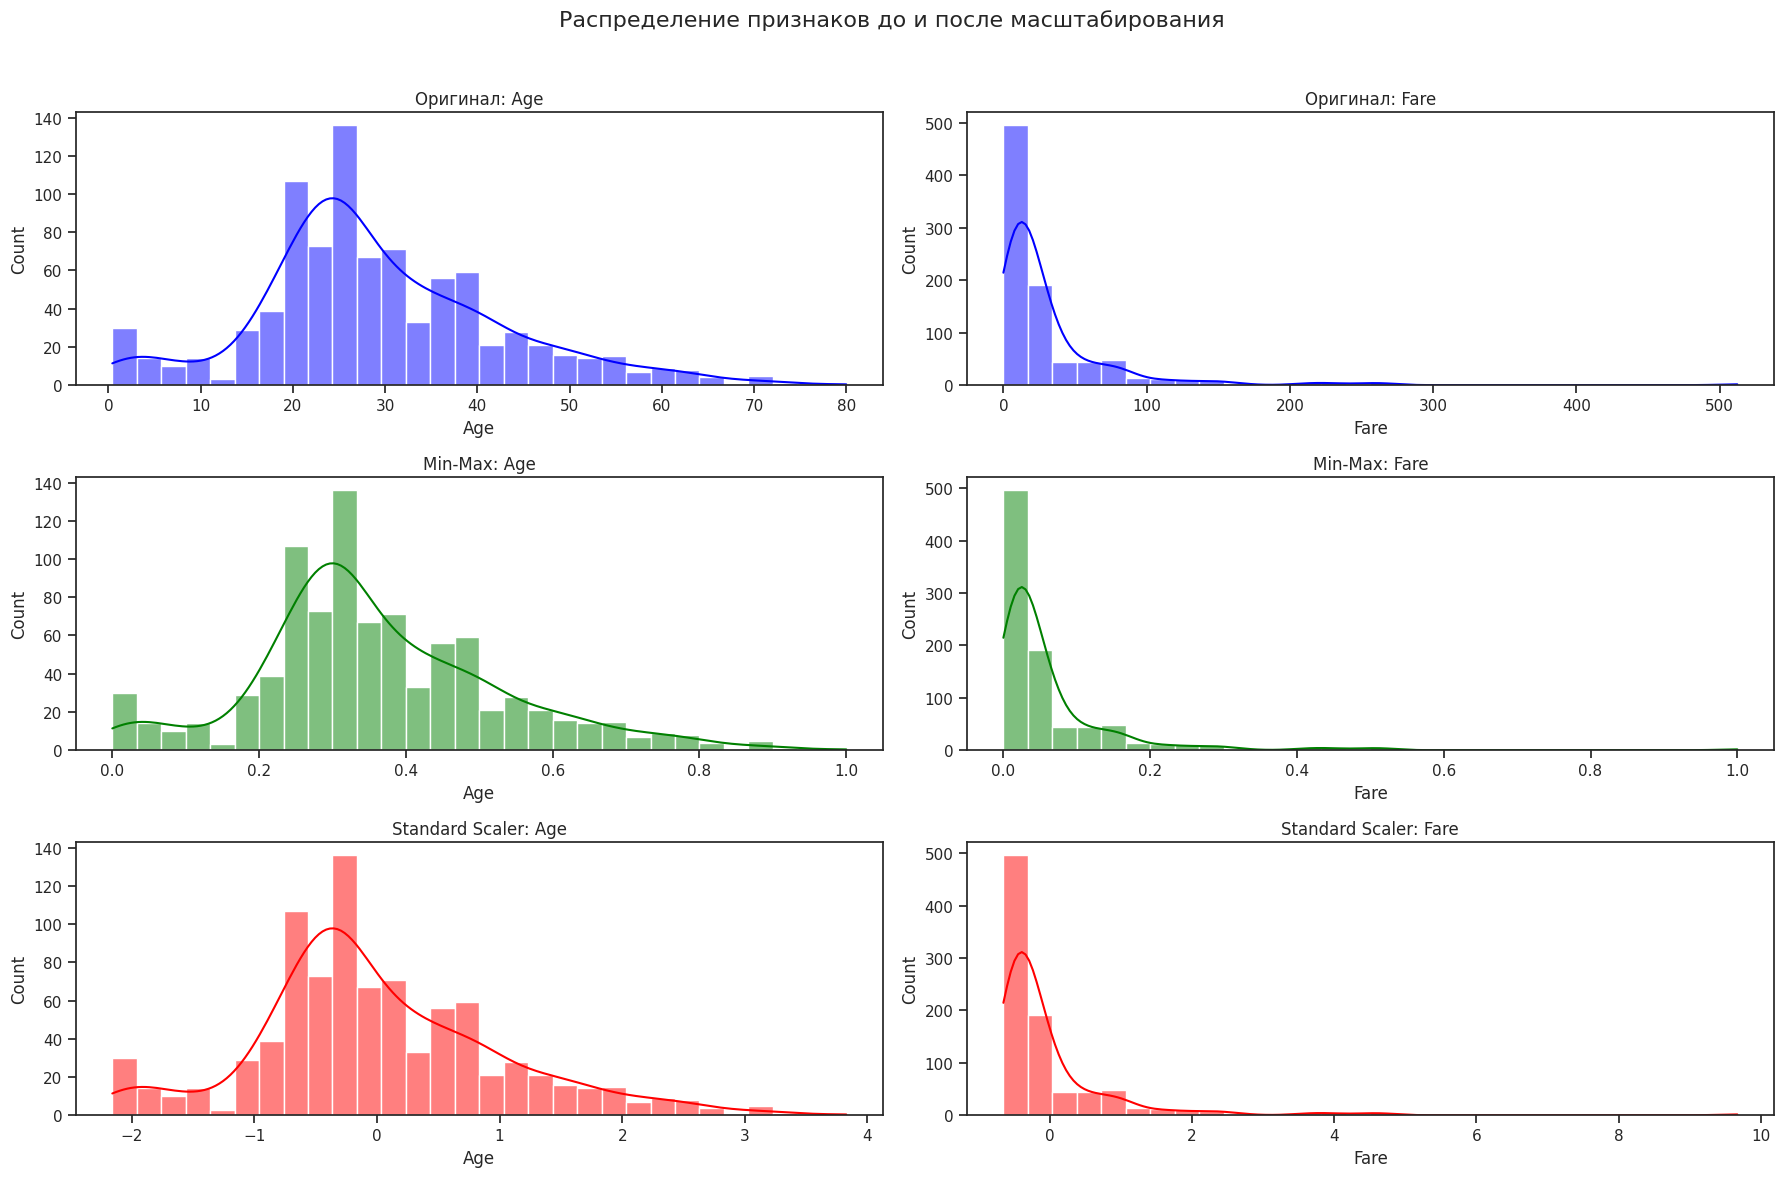

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = cdata
# Выбираем числовые признаки для масштабирования
num_features = ["Age", "Fare"]
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_features] = min_max_scaler.fit_transform(df[num_features])

standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[num_features] = standard_scaler.fit_transform(df[num_features])

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle("Распределение признаков до и после масштабирования", fontsize=16)

for i, feature in enumerate(num_features):
    # Оригинальные данные
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Оригинал: {feature}")

    # Min-Max Scaling
    sns.histplot(df_minmax[feature], bins=30, kde=True, ax=axes[1, i], color="green")
    axes[1, i].set_title(f"Min-Max: {feature}")

    # Standard Scaling
    sns.histplot(df_standard[feature], bins=30, kde=True, ax=axes[2, i], color="red")
    axes[2, i].set_title(f"Standard Scaler: {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()